In [5]:
from PIL import Image
import random
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import glob
from Levenshtein import distance
import face_recognition

import easyocr
import face_recognition
reader = easyocr.Reader(['en']) # need to run only once to load model into memory

BASE_PATH = 'data/video/'
FILE_NAME = 'Accelerate Your Workflows With Secured Digital Signature.mp4'

def analyze_video(video, start_frame=0, end_frame=None, sampling_rate=1):
    """Find chicken dinner in video"""
    w, h, fps, num_frames = get_detail(video)
    print(w, h, fps, num_frames)
    start_frame = start_frame
    end_frame = end_frame if end_frame else num_frames
    step = int(round(sampling_rate * fps))
    start = time.time()
    cap = cv2.VideoCapture(video)
    i = start_frame
    output = []
    all_res = []
    while cap.isOpened() and i < end_frame:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
#         print(i)
        ret, frame = cap.read()
#         print(frame)
#         try:
        temp_res = run_inference(frame)
#         except:
#             return frame
        all_res.append(temp_res)
        i += step

    cap.release()
    end = time.time()

    return {
        'start_frame' : start_frame,
        'end_frame' : end_frame,
        'result_feature': all_res,
        'step':step,
        'fps':fps
    }

def get_detail(vid_file):
    cap = cv2.VideoCapture(vid_file)

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width, height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    cap.release()

    return width, height, fps, total_frames

def run_inference(frame):
    all_text_here = reader.readtext(frame) #OCR
    all_faces_locations = face_recognition.face_locations(frame)
    all_faces_features_here = face_recognition.face_encodings(frame)#FACE
    
    return {
        'text':all_text_here,
        'faces_location':all_faces_locations,
        'faces_features':all_faces_features_here
    }

In [2]:
all_data = glob.glob(BASE_PATH+'*.mp4')

In [3]:
result = analyze_video(all_data[0],
                       #start_frame=10000,
                       #end_frame=15000, 
                       sampling_rate = 10)

1920 1080 29.97002997002997 118981
0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
9900
10200
10500
10800
11100
11400
11700
12000
12300
12600
12900
13200
13500
13800
14100
14400
14700
15000
15300
15600
15900
16200
16500
16800
17100
17400
17700
18000
18300
18600
18900
19200
19500
19800
20100
20400
20700
21000
21300
21600
21900
22200
22500
22800
23100
23400
23700
24000
24300
24600
24900
25200
25500
25800
26100
26400
26700
27000
27300
27600
27900
28200
28500
28800
29100
29400
29700
30000
30300
30600
30900
31200
31500
31800
32100
32400
32700
33000
33300
33600
33900
34200
34500
34800
35100
35400
35700
36000
36300
36600
36900
37200
37500
37800
38100
38400
38700
39000
39300
39600
39900
40200
40500
40800
41100
41400
41700
42000
42300
42600
42900
43200
43500
43800
44100
44400
44700
45000
45300
45600
45900
46200
46500
46800
47100
47400
47700
48000
48300
48600
48900
49200
49500
49800
501

In [6]:
all_meta = {all_data[0]:result}

In [8]:
all_meta.keys()

dict_keys(['data/video/How to Increase Code Quality with Clean Code on Android.mp4'])

In [ ]:
for i in range(1,len(all_data)):
    print(all_data[i])
    result = analyze_video(all_data[i],
                       #start_frame=10000,
                       #end_frame=15000, 
                       sampling_rate = 10)
    all_meta[all_data[i]] = result

data/video/A Way of Creating Social Media Persona.mp4
1920 1080 29.97002997002997 168282
data/video/A Roadmap Journey to Become a Modern Front End Developer​.mp4
1920 1080 29.97002997002997 185065
data/video/Rapat Anggota Tahunan (RAT) Kopegtel RisTi Tahun Buku 2019.mp4
1920 1080 29.97002997002997 197524
data/video/Visit of University Technology Petronas Malaysia.mp4
0 0 0.0 0
data/video/Crafting Your Powerful Personal Branding.mp4
1920 1080 29.97002997002997 218782
data/video/What Is Guild and Why Engineering Excellence Matters for World Class Products.mp4
1920 1080 29.97002997002997 160939


In [221]:
all_meta['data/video/How to Increase Code Quality with Clean Code on Android.mp4'].keys()

dict_keys(['start_frame', 'end_frame', 'result_feature', 'step', 'fps', 'agg_text', 'agg_faces'])

In [220]:
all_meta['data/video/How to Increase Code Quality with Clean Code on Android.mp4']

{'start_frame': 0,
 'end_frame': 118981,
 'result_feature': [{'text': [], 'faces_location': [], 'faces_features': []},
  {'text': [([[481, 471], [683, 471], [683, 605], [481, 605]],
     'Inn',
     0.8732539350655252),
    ([[812, 464], [1453, 464], [1453, 632], [812, 632]],
     'vationDay',
     0.9996518303264178)],
   'faces_location': [],
   'faces_features': []},
  {'text': [], 'faces_location': [], 'faces_features': []},
  {'text': [], 'faces_location': [], 'faces_features': []},
  {'text': [],
   'faces_location': [(297, 1221, 759, 759)],
   'faces_features': [array([-0.06273912,  0.05653845,  0.07840276, -0.05111668, -0.1594891 ,
           -0.03093689, -0.0571579 , -0.08115758,  0.17384866, -0.12852032,
            0.21464282, -0.12318147, -0.16705874,  0.03861709, -0.02884046,
            0.20723572, -0.15089981, -0.09859549, -0.06316404, -0.0335922 ,
            0.10931987,  0.0077439 , -0.0069914 ,  0.01721008, -0.16943848,
           -0.34202304, -0.07498463, -0.05710191

In [10]:
all_meta.keys()

dict_keys(['data/video/How to Increase Code Quality with Clean Code on Android.mp4', 'data/video/A Way of Creating Social Media Persona.mp4', 'data/video/A Roadmap Journey to Become a Modern Front End Developer\u200b.mp4', 'data/video/Rapat Anggota Tahunan (RAT) Kopegtel RisTi Tahun Buku 2019.mp4', 'data/video/Visit of University Technology Petronas Malaysia.mp4', 'data/video/Crafting Your Powerful Personal Branding.mp4', 'data/video/What Is Guild and Why Engineering Excellence Matters for World Class Products.mp4', 'data/video/Agile Implementation with Scrum Framework.mp4', 'data/video/Berubah atau Punah - Bagaimana UKM survive di Next Normal.mp4', 'data/video/Use API to Accelerate The Making of Your Ideas.mp4', 'data/video/How to Get Your Product Being Adopted and Used by the User.mp4', 'data/video/Stay Productive While Remote Working With Scrum Implementation.mp4', 'data/video/Digitalisasi UMKM dengan BONUM POS.mp4', 'data/video/Rapat Anggota Tahunan - Tahun Buku  2019 - Kopegtel Ka

In [18]:
all_meta['data/video/How to Increase Code Quality with Clean Code on Android.mp4']['result_feature'][10]

{'text': [([[89, 75], [211, 75], [211, 143], [89, 143]],
   'dev',
   0.5639283061027527),
  ([[1722, 93], [1873, 93], [1873, 131], [1722, 131]],
   'vationBa',
   0.11122160610955656),
  ([[268, 885], [672, 885], [672, 953], [268, 953]],
   'Nabilah Nararya',
   0.9757932758556119),
  ([[272, 958], [418, 958], [418, 990], [272, 990]],
   'Moderator',
   0.9999716677248364),
  ([[1648.9011154884106, 88.1539042094367],
    [1701.619274808804, 96.29681185468048],
    [1695.0988845115894, 130.84609579056328],
    [1643.380725191196, 123.70318814531952]],
   'Inn',
   0.7340114899236049)],
 'faces_location': [(297, 1272, 759, 810)],
 'faces_features': [array([-5.78242242e-02,  5.44702597e-02,  7.75742158e-02, -4.43198793e-02,
         -1.73600361e-01, -6.47711661e-03, -3.19320783e-02, -9.64976996e-02,
          1.84490740e-01, -1.30005211e-01,  2.03348503e-01, -1.13984413e-01,
         -1.93420216e-01,  2.48085223e-02, -4.48333509e-02,  2.34984681e-01,
         -1.56319544e-01, -1.05855033

In [22]:
distance('halo data','hala kcdata')

3

In [211]:
def distance_text(a,b):
    if max(len(a),len(b))==0:
        return 1
    return distance(a,b)/max(len(a),len(b))
def reshape_text(data1, data2, idx):
    for word in data2:
        used_word = word[1].lower()
        found = False
        for key in data1.keys():
            dist = distance_text(key,used_word)
            if dist<0.1:
                
                if data1[key][-1]['end']+1 == idx:
                    data1[key][-1]['end']+=1
                else:
                    data1[key].append({'start':idx, 'end':idx})
                found = True
                break
        if not found:
#             print('word : ',word[1].lower())
#             print(data1)
            data1[used_word] = [{'start':idx, 'end':idx}]
    return data1
    
def aggregate_text(all_text):
    aggregated_text = {}
    for idx,txt in enumerate(all_text):
        aggregated_text = reshape_text(aggregated_text,txt,idx)
    return aggregated_text

def reshape_faces(data1, data2, idx):
    for face1 in data2:
        found = False
        for k in data1.keys():
            dis = face_recognition.face_distance([data1[k]['face_image']] , face1)
            if dis<0.4:
                data1[k]['time'].append(idx)
                found=True
                break
        if not found:
            if len(data1.keys())>0:
                new_idx = max(list(data1.keys()))+1
            else:
                new_idx=0
            data1[new_idx] = {'face_image':face1,'time':[idx]}        
    return data1


def aggregate_faces(all_faces):
    aggregated_faces = {}
    for idx,faces in enumerate(all_faces):
        aggregated_faces = reshape_faces(aggregated_faces,faces,idx)
    return aggregated_faces
def get_image(file_name, frame):
    cap = cv2.VideoCapture(file_name)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    _,res = cap.read()
    return Image.fromarray(res)

# def get_text_data(all_data):
    
#     for i in all_data['result_feature']:
#         for j in i:

In [226]:
all_meta['data/video/How to Increase Code Quality with Clean Code on Android.mp4']['agg_faces'][0]['time']

[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 135,
 136,
 252,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 374,
 375,
 376,
 377,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395]

In [228]:
all_meta['data/video/How to Increase Code Quality with Clean Code on Android.mp4']['agg_text']['telkom']

[{'start': 14, 'end': 14},
 {'start': 16, 'end': 16},
 {'start': 21, 'end': 21},
 {'start': 28, 'end': 28},
 {'start': 33, 'end': 33},
 {'start': 38, 'end': 38},
 {'start': 40, 'end': 40},
 {'start': 45, 'end': 45},
 {'start': 50, 'end': 50},
 {'start': 52, 'end': 52},
 {'start': 57, 'end': 57},
 {'start': 62, 'end': 62},
 {'start': 64, 'end': 64},
 {'start': 69, 'end': 69},
 {'start': 74, 'end': 74},
 {'start': 76, 'end': 76},
 {'start': 81, 'end': 81},
 {'start': 86, 'end': 86},
 {'start': 88, 'end': 88},
 {'start': 93, 'end': 93},
 {'start': 98, 'end': 98},
 {'start': 100, 'end': 100},
 {'start': 105, 'end': 105},
 {'start': 110, 'end': 110},
 {'start': 112, 'end': 112},
 {'start': 117, 'end': 117},
 {'start': 122, 'end': 122},
 {'start': 124, 'end': 124},
 {'start': 129, 'end': 129},
 {'start': 134, 'end': 134},
 {'start': 136, 'end': 136},
 {'start': 141, 'end': 141},
 {'start': 146, 'end': 146},
 {'start': 148, 'end': 148},
 {'start': 153, 'end': 153},
 {'start': 158, 'end': 158}

In [212]:
for key in all_meta.keys():
    print(key)
    res_faces = aggregate_faces([i['faces_features'] for i in all_meta[key]['result_feature']])
    res_text = aggregate_text([i['text'] for i in all_meta[key]['result_feature']])
    all_meta[key]['agg_text'] = res_text
    all_meta[key]['agg_faces'] = res_faces
    

data/video/How to Increase Code Quality with Clean Code on Android.mp4
data/video/A Way of Creating Social Media Persona.mp4
data/video/A Roadmap Journey to Become a Modern Front End Developer​.mp4
data/video/Rapat Anggota Tahunan (RAT) Kopegtel RisTi Tahun Buku 2019.mp4
data/video/Visit of University Technology Petronas Malaysia.mp4
data/video/Crafting Your Powerful Personal Branding.mp4
data/video/What Is Guild and Why Engineering Excellence Matters for World Class Products.mp4
data/video/Agile Implementation with Scrum Framework.mp4
data/video/Berubah atau Punah - Bagaimana UKM survive di Next Normal.mp4
data/video/Use API to Accelerate The Making of Your Ideas.mp4
data/video/How to Get Your Product Being Adopted and Used by the User.mp4
data/video/Stay Productive While Remote Working With Scrum Implementation.mp4
data/video/Digitalisasi UMKM dengan BONUM POS.mp4
data/video/Rapat Anggota Tahunan - Tahun Buku  2019 - Kopegtel Kantor Perusahaan.mp4
data/video/Database Implementation I

In [213]:
import pickle

In [132]:
img = Image.open('sendylenvi regia.png').convert('RGB')

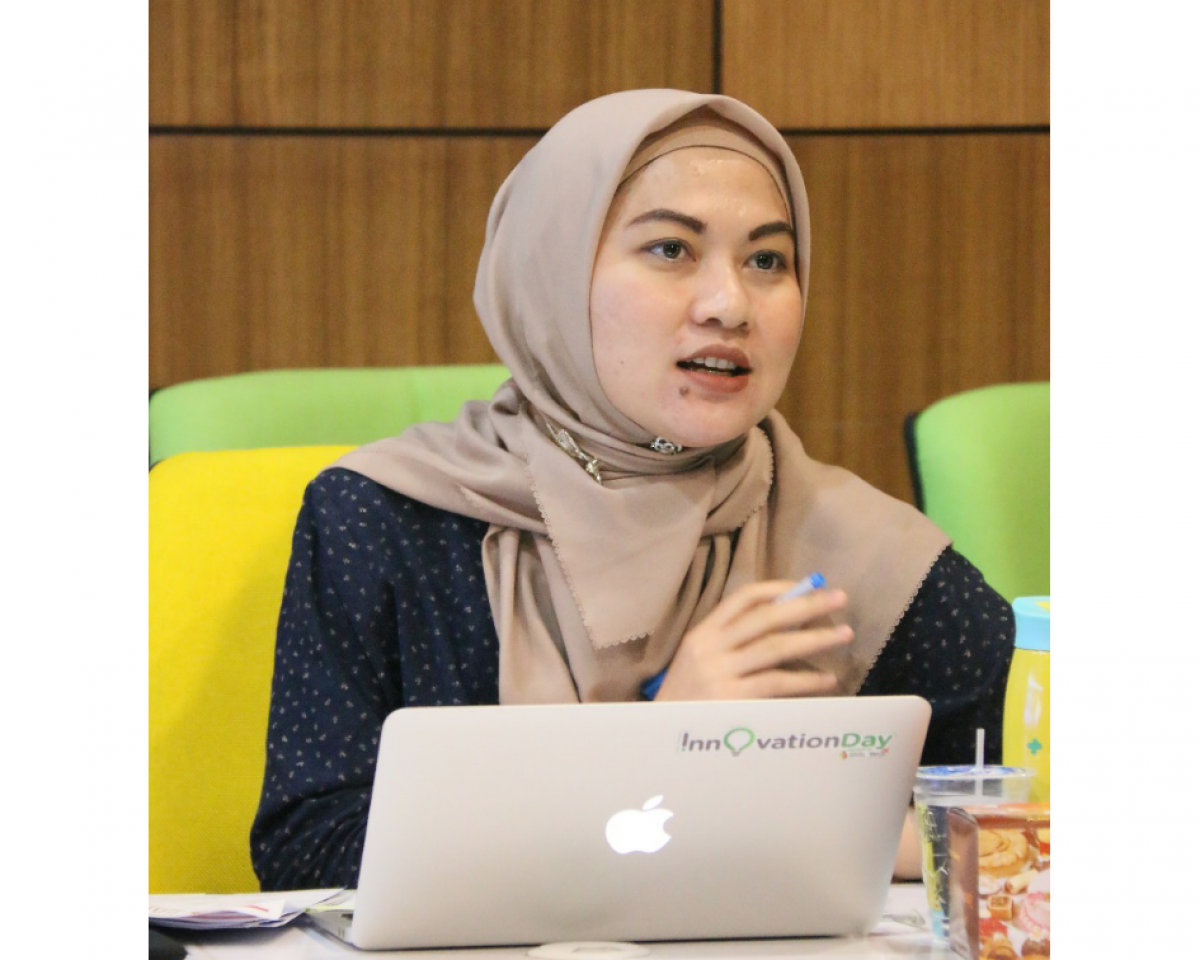

In [229]:
img

In [133]:
poi_face = face_recognition.face_encodings(np.array(img))

In [204]:
found_data = []
for key in all_meta.keys():
    for face in all_meta[key]['agg_faces'].keys():
        distance = face_recognition.face_distance(all_meta[key]['agg_faces'][face]['face_image'],poi_face)
        if distance<0.4:
            print(key, face)
            print(distance)
            found_data.append((key,face))

data/video/Developing Learning Culture to Enhance Innovative Work Behavior.mp4 0
[0.35446251]
data/video/Empati Kepada Pelanggan.mp4 0
[0.35739165]


In [193]:
def show_image_face(file_name, face_num, all_data,idx_scene=0):
    location_scenes = all_data[file_name]['agg_faces'][face_num]['time']
    print('time : ',np.array(location_scenes)*all_data[file_name]['step']//30)
    img = get_image(file_name, location_scenes[idx_scene]*all_data[file_name]['step'])
    print(location_scenes[idx_scene]*all_data[file_name]['step']//30)
    return img

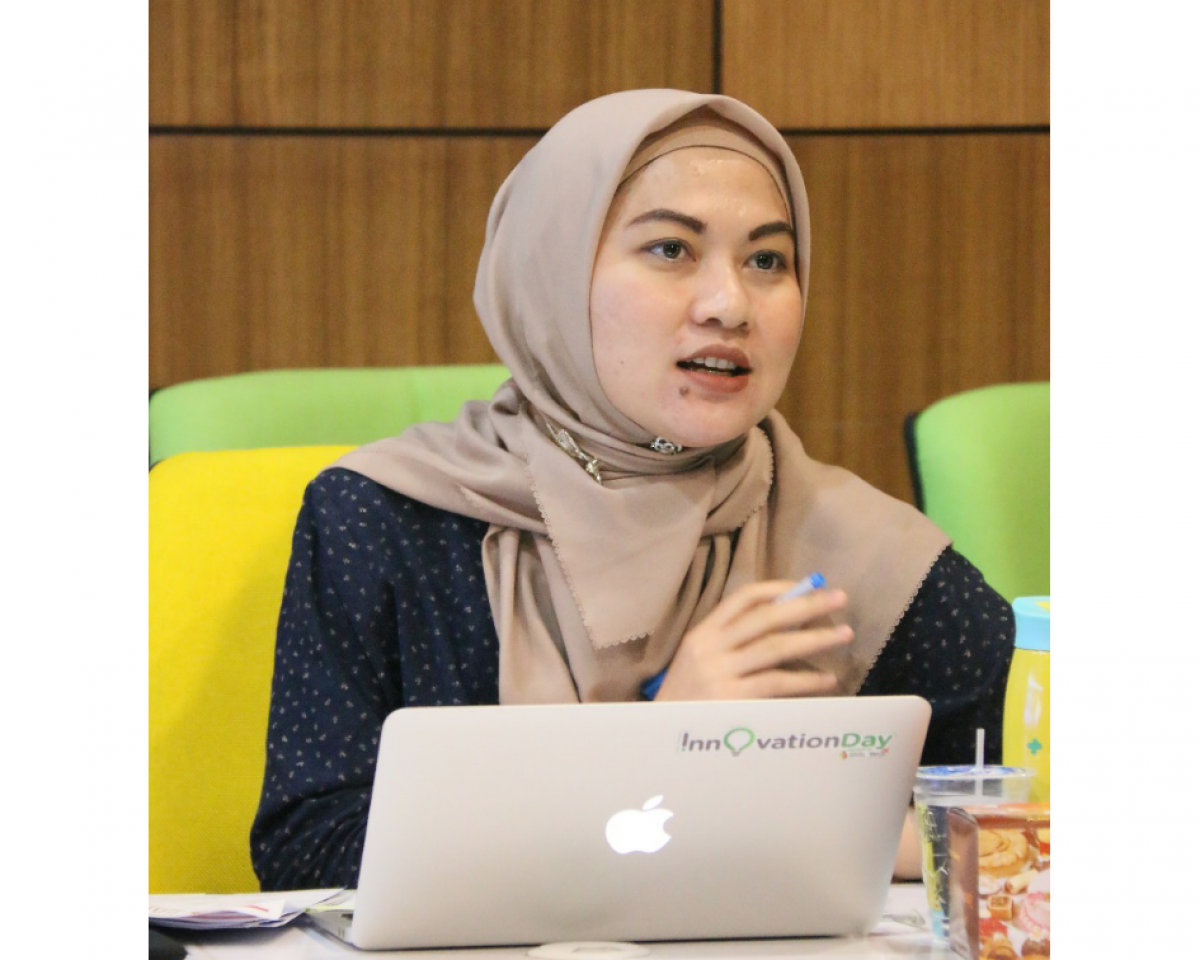

In [155]:
img

In [205]:
face_recognition.face_distance(all_meta['data/video/Developing Learning Culture to Enhance Innovative Work Behavior.mp4']['agg_faces'][0]['face_image'],poi_face)

array([0.35446251])

In [185]:
found_data[found_idx][0]

'data/video/A Way of Creating Social Media Persona.mp4'

In [218]:
pickle.dump(all_meta,open('face_features_extracted','wb'))

time :  [  50   60   70   80   90  100  110  120  130  140  150  160  170  180
  200  210  220  230  240  250  260  270  280  290  300  310  320  330
  340  350  360  370  380  390  400  410  420  430  440  450  460 1230
 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370
 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510
 1520 1530 1540 1550 1560 1570 1580 1590 1620 1630 1640 1650 1660 1670
 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810
 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950
 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090
 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200 2210 2220 2220
 2230 2240 2250 2260 2270 2280 2290 2300 2310 2320 2330 2340 2350 2360
 2370 2380 2390 2400 2410 2420 2450 2460 2470 2480 2490 2500 2510 2520
 2530 2540 2550 2560 2570 2580 2590 2600 2610 2620 2630 2640 2650 2660
 2670 2680 2690 2700 2710 2720 2730 2740 2750 2760 2770 2780 2790 280

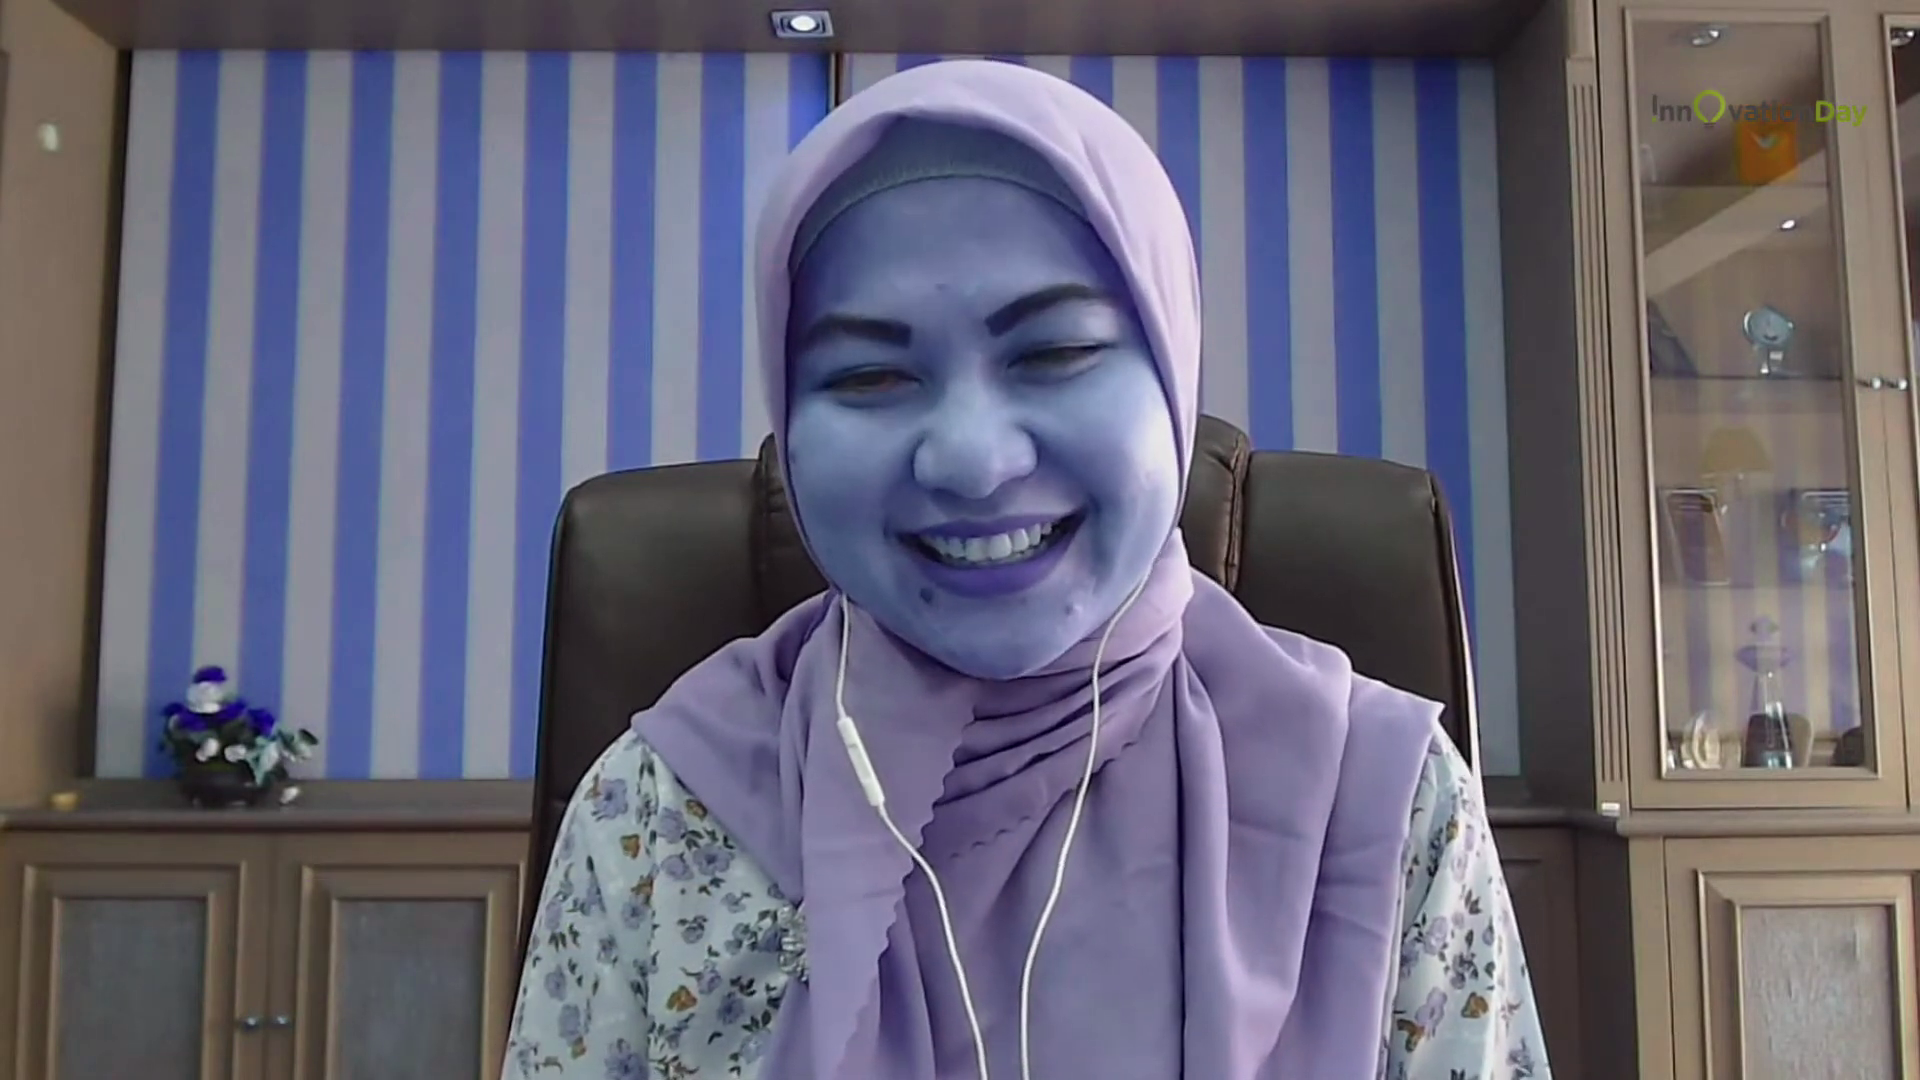

In [207]:
found_idx = 1
show_image_face(found_data[found_idx][0],found_data[found_idx][1],all_meta,idx_scene = 13)

In [ ]:
pickle.dump(all_meta,open('face_features','wb'))

In [39]:
all_faces_feature_here = face_recognition.face_encodings(frame)

In [44]:
all_faces_feature_here

[array([-3.60447504e-02,  1.23648621e-01,  4.05139290e-02, -2.39417292e-02,
        -9.32831019e-02, -1.30951069e-02, -1.16527550e-01, -1.17409810e-01,
         1.05531402e-01, -1.49833590e-01,  1.54361814e-01, -1.45531029e-01,
        -1.94589600e-01, -4.06840034e-02, -6.37524724e-02,  2.05337554e-01,
        -1.35645449e-01, -1.67142972e-01, -1.02486145e-02, -7.11550191e-03,
         8.92661810e-02,  3.13200802e-03, -1.31396018e-02,  9.79244411e-02,
        -1.50889650e-01, -4.03696299e-01, -9.78037566e-02, -6.73330724e-02,
        -8.85915235e-02, -1.05383888e-01, -8.22138786e-02,  1.13268301e-01,
        -9.76257399e-02,  2.47509535e-02,  4.29423787e-02,  9.65850800e-02,
         2.69772373e-02, -1.00873567e-01,  1.83437839e-01,  1.08215930e-02,
        -2.61299193e-01,  3.21413539e-02,  1.16387650e-01,  2.52316624e-01,
         1.99988842e-01,  2.74307467e-02,  2.07735971e-03, -1.09275579e-01,
         1.59871683e-01, -2.00865656e-01,  2.85882484e-02,  1.43986106e-01,
         7.3

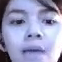

In [28]:
Image.fromarray(frame[571:633,1075:1137])

In [15]:
reader.readtext(frame, detail = 0)

['iccume',
 'Telkom',
 'esia',
 'LIVE',
 'Indonesia',
 'the world in your hand',
 'Old Ways',
 'Nowadays',
 'Face to Face',
 'Fast Turnaround',
 'Time Consuming',
 'Workflow Efficiency',
 'Human Error',
 'Cost Saving',
 'Cost Needed',
 'Strengthen Securitv',
 'Hard to Manage',
 'Undeniak',
 'Eco friend']